## Exploring the difference between output of Neural network model and output of theoretical methods used for computing option price and it's implied volatility

---


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
import os

import warnings
warnings.filterwarnings("ignore") # just to remove clutter in the notebook

### <font color='Blue'> 1. Black-Scholes Model</font>

---

In [5]:
from model.pricing.utils.get_data import get_current_price, pre_processing
from model.pricing.core.black_scholes import create_dataset

In [6]:
model_save_path = os.getcwd() + "/model/output/" + "BS_NN_model.h5"
bs_nn_model = tf.keras.models.load_model(model_save_path, compile=False)

#### <font color='Blue'>  1.1 Create datset using the below range of input parameters using Latin Hypercube sampling. </font>

|  |  |  |
|:---|:---|:---|
|      | Parameters |  Range|
|Input |Moneyness ($S_{o}$ / K) |  [0.4,1.6] |
|      |Time to Maturity | [0.2,1.1]   |
|      |Risk Free rate | [0.02,0.1] | 
|      |Volatility | [0.01,1] |
|Output|Call Price (V / K) |  [0.0,0.9]    |

---

#### <font color='Blue'> 1.2 Computes black scholes price for a test data set and then compute option price by strike. </font> 

---

In [9]:
test_data_set_size = 100000
df, st_current_price, range_of_inputs = pre_processing(test_data_set_size, "BS")
dt_test = create_dataset(df, st_current_price, range_of_inputs)
otpt_using_BS = np.array(dt_test['opt_price_by_strike'])

#### <font color='Blue'>  1.3 Using the trained BS NN model and input parameters, we computed option price ( V / K) and compared it with option price by strike ratio obtained in above step </font>

In [12]:
feature_columns = ['moneyness', 'time_to_maturity', 'risk_free_rate', 'volatility']
x_test = dt_test[feature_columns]
y_predict = bs_nn_model.predict(x_test)

2959/2959 [==============================] - 1s 461us/step


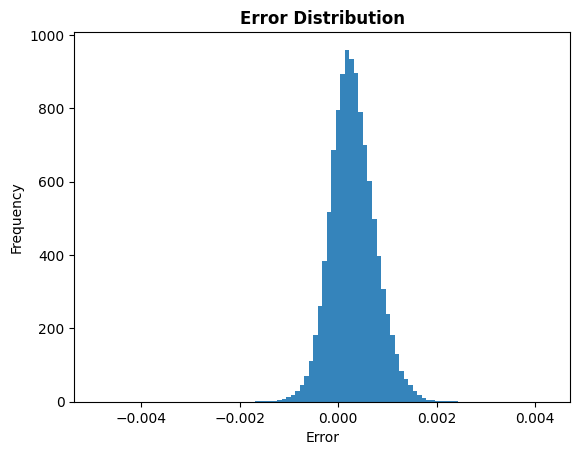

In [13]:
otpt_using_nn_model = [y[0] for y in y_predict]
diff = np.subtract(otpt_using_BS, otpt_using_nn_model)
plt.hist(diff, 100, density=1, alpha=0.9)
plt.xlabel('Error')
plt.ylabel('Frequency')
  
plt.title('Error Distribution', fontweight ="bold")
plt.show()

### <font color='Blue'>  2. Combining Heston Pricing NN model and Implied Volatility NN model </font>

---

In [ ]:
heston_model_save_path = os.getcwd() + "/model/output/" + "BS_NN_model.h5"
heston_nn_model = tf.keras.models.load_model(model_save_path, compile=False)